# 📊 Startup Funding EDA Project

## 📁 Project Overview

In this project, we perform an Exploratory Data Analysis (EDA) on a comprehensive dataset of global startup funding rounds. With startups being the backbone of innovation and economic growth, understanding funding trends can provide meaningful insight into market confidence, investment patterns, and evolving industry focus over time.

### 💡 Why This Matters:

Startup funding is a strong indicator of innovation pipelines and economic sentiment. VCs, policymakers, and founders can all benefit from recognizing long-term patterns.

This project also showcases practical data wrangling, cleaning, and visual storytelling skills.

### 🎯 Project Goal: Our primary goal is to extract insights from historical funding round data:

Identify which industries and countries attract the most investment.

Detect shifts in funding activity over time.

Understand which types of funding (e.g., seed, series A, venture) dominate different periods.


## 📌 Table of Contents

- [📂 Project Overview](#-project-overview)
- [📚 Dataset Summary](#-dataset-summary)
- [🧼 Data Cleaning Steps](#-data-cleaning-steps)
- [📊 Distribution of Funding Round Types](#-distribution-of-funding-round-types)
- [📈 VC Funding Trends by Round Type (2000+)](#-vc-funding-trends-by-round-type-2000)
- [🏭 Top Industries by Funding](#-top-industries-by-funding)
- [💹 VC Funding Trends by Round Type (2000+)](#-vc-funding-trends-by-round-type-2000-1)
- [🌍 Geographic Insights: Top Countries Leading in VC Funding](#-geographic-insights-top-countries-leading-in-vc-funding)
- [💼 VC Powerhouses: Top 10 Startups by Total Funding Raised](#-vc-powerhouses-top-10-startups-by-total-funding-raised)
- [🌐 Streamlit Dashboard Overview](#-streamlit-dashboard-overview)
- [🔍 Final Reflection & Project Summary](#-final-reflection--project-summary)


## 📚 Dataset Summary

This analysis is based on **two core datasets** containing information on startup funding rounds and company profiles.

- **Source:** Originally compiled by **Crunchbase** and distributed via curated public datasets  
- **Size:** Over **100,000 records** combined across both files  

### 🗂️ Files Used

- `funding_rounds.csv`:  
  Contains detailed records of startup funding rounds including:
  - Amount raised
  - Date
  - Funding type

- `objects.csv`:  
  Provides company metadata such as:
  - Industry (`category_code`)  
  - Country (`country_code`)

### 🔑 Key Columns

- `raised_amount_usd`: Amount raised in a funding round  
- `funding_round_type`: Type of funding (e.g., seed, series A, venture)  
- `funded_at`: Date when the round was closed  
- `category_code`: Industry classification  
- `country_code`: ISO-3 country code  

In [ ]:
import os

# Move into project folder
os.chdir(r"C:\Users\user\startup-investment-trends-eda")

# Confirm
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\user\startup-investment-trends-eda


In [34]:
# Data Manipulation
import pandas as pd

# File Handling
import zipfile
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Extract Dataset
The compressed dataset is extracted into a local folder named `startup_data` for further analysis.


In [35]:
import os

# Set correct working directory
os.chdir(r"C:\Users\user\startup-investment-trends-eda")
print("Current Working Directory:", os.getcwd())

# Check if the extracted folder exists
if os.path.exists('startup_data'):
    print("✅ Extracted folder found. Ready to proceed!")
else:
    print("❌ Extracted folder NOT found. Please check your setup.")


Current Working Directory: C:\Users\user\startup-investment-trends-eda
✅ Extracted folder found. Ready to proceed!


In [36]:
# Load the funding rounds CSV
df = pd.read_csv("startup_data/funding_rounds.csv")

# Show first 5 rows
df.head()


,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


## 🧼 Data Cleaning Steps

To ensure accuracy and consistency across the dataset, the following data cleaning steps were applied:

1. **Removed Missing Values**  
   - Dropped rows where the `raised_amount_usd` field was null or zero, as these indicate incomplete or non-informative records.

2. **Converted Dates**  
   - Parsed the `funded_at` column into `datetime` format using `pd.to_datetime()` with coercion to handle errors.  
   - Extracted the year into a new column `year` for time-based trend analysis.

3. **Filtered Valid Entries**  
   - Removed any rows where `funded_at` could not be parsed into a valid date.

4. **Previewed Cleaned Data**  
   - Displayed a few cleaned records with key columns (`funding_round_type`, `raised_amount_usd`, `funded_at`, `year`) to verify successful cleaning.

These steps formed the foundation for all downstream analysis and ensured we worked only with structured, valid, and analyzable records.


In [ ]:
# Remove rows with missing funding amounts 
df = df[df['raised_amount_usd'].notna()].copy()

# Convert 'funded_at' column to datetime format ---
df['funded_at'] = pd.to_datetime(df['funded_at'], errors='coerce')

# Drop rows with invalid dates after conversion ---
df = df[df['funded_at'].notna()].copy()

# Create a new column extracting the year ---
df['year'] = df['funded_at'].dt.year

# Preview the cleaned dataset ---
df[['funding_round_type', 'raised_amount_usd', 'funded_at', 'year']].head()


,funding_round_type,raised_amount_usd,funded_at,year
0,series-b,8500000.0,2006-12-01,2006
1,angel,500000.0,2004-09-01,2004
2,series-a,12700000.0,2005-05-01,2005
3,series-b,27500000.0,2006-04-01,2006
4,series-b,10500000.0,2006-05-01,2006


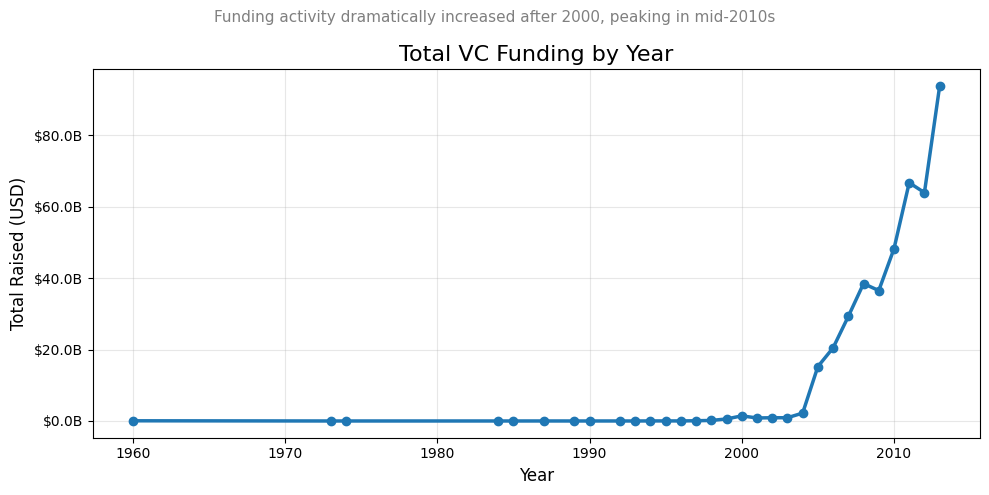

In [38]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Make sure the folder exists
os.makedirs("figures", exist_ok=True)

# Group by year and sum raised amounts
yearly_funding = df.groupby('year')['raised_amount_usd'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(yearly_funding['year'], yearly_funding['raised_amount_usd'], marker='o', linewidth=2.5)
plt.title("Total VC Funding by Year", fontsize=16)
plt.suptitle("Funding activity dramatically increased after 2000, peaking in mid-2010s", fontsize=11, color='gray')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Raised (USD)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))
plt.tight_layout()

# Save the chart
plt.savefig("figures/funding_by_year.png")
plt.show()


## 📈 VC Funding Trends by Year

**🔍 Question:**  
*How has total venture capital funding changed over time?*

**💡 Insight:**  
- Venture capital funding rose significantly starting in the early 2000s.  
- The sharp surge between **2010–2015** likely reflects a global tech boom and increased investor confidence post-2008 financial crisis.  
- While growth plateaued slightly after 2016, funding remains substantially higher than in previous decades.  

**📊 Why It Matters (Business Implications):**  
- **Investors** can use this trend to align fund allocation strategies with macroeconomic cycles and emerging tech booms.  
- **Startup founders** can better time funding rounds and market entry by analyzing peak investment periods.  
- **Policy-makers and ecosystem builders** can benchmark this surge to foster environments that attract VC through innovation incentives.


C:\Users\user\AppData\Local\Temp\ipykernel_13320\2960479116.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


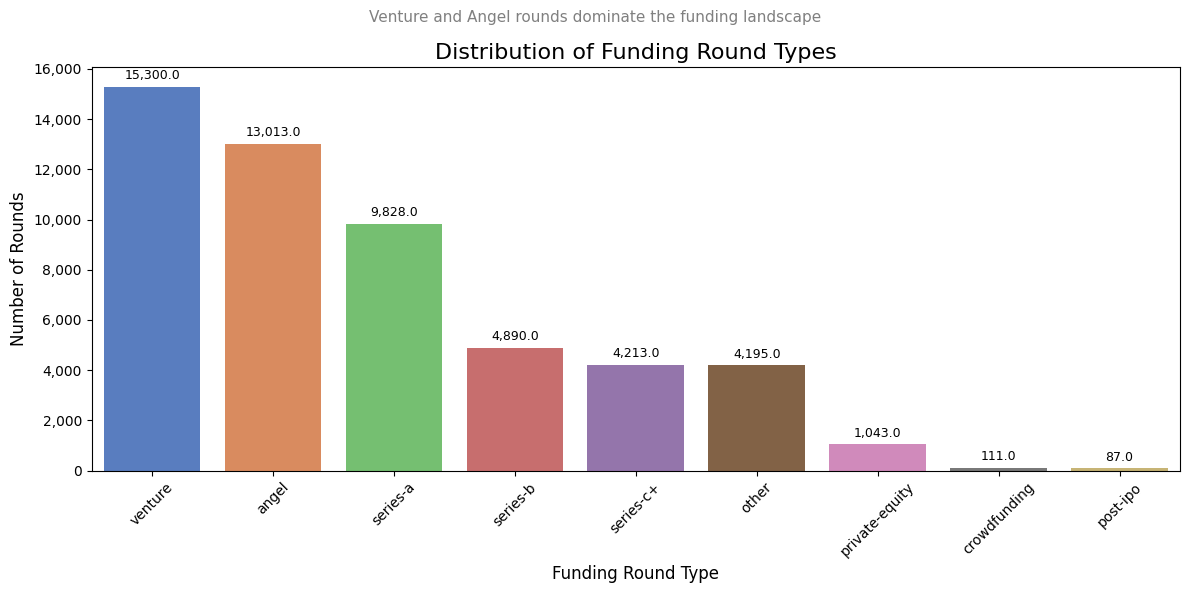

In [ ]:
import matplotlib.ticker as ticker

# Plot Funding Round Type Distribution 

# Create figure
plt.figure(figsize=(12, 6))

# Create countplot
ax = sns.countplot(
    data=df,
    x='funding_round_type',
    order=df['funding_round_type'].value_counts().index,
    palette="muted",
    hue=None   # Explicitly setting hue to suppress future warnings
)

# Title and subtitle
plt.title("Distribution of Funding Round Types", fontsize=16)
plt.suptitle("Venture and Angel rounds dominate the funding landscape", fontsize=11, color='gray')

# Axis labels
plt.ylabel("Number of Rounds", fontsize=12)
plt.xlabel("Funding Round Type", fontsize=12)
plt.xticks(rotation=45)

# Format y-axis with commas (e.g., 10,000)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add value labels above bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.1f}',                     # Show with one decimal and commas
        (p.get_x() + p.get_width() / 2, height + 300),  # Position a little above the bar
        ha='center', fontsize=9
    )

# Tight layout
plt.tight_layout()

# Save the figure
plt.savefig("figures/funding_type_distribution.png")

# Display the plot
plt.show()


## 🏷️ Funding Round Type Distribution

**🔍 Question:**  
Which funding round types are most common in the startup ecosystem?

**💡 Insight:**  
Venture and Angel rounds dominate the funding landscape, with over **28,000 rounds combined**. This underscores the importance of **early-stage capital** in fueling innovation and getting startups off the ground.

**Series A** is the most frequent institutional round, signaling that many startups are able to secure follow-on funding after initial traction. In contrast, **later-stage rounds** like Series B, Series C+, and Private Equity show steep drop-offs — reflecting the **natural filtering and survival curve** in startup scaling.

**Crowdfunding and Post-IPO rounds** are the least common, suggesting that **non-traditional or exit-stage funding strategies were niche** in this dataset's timeframe.

**📊 Why This Matters (Business Implication):**  
- **For Investors:** High activity in early-stage rounds points to **opportunities in seed/angel portfolios** but also increased competition.  
- **For Founders:** Emphasizes the need to **focus on pre-Series A storytelling, MVP traction, and investor readiness**.  
- **For Policy Makers & Accelerators:** Highlights a chance to **strengthen support mechanisms** for startups between Series A and Series B to reduce drop-off.



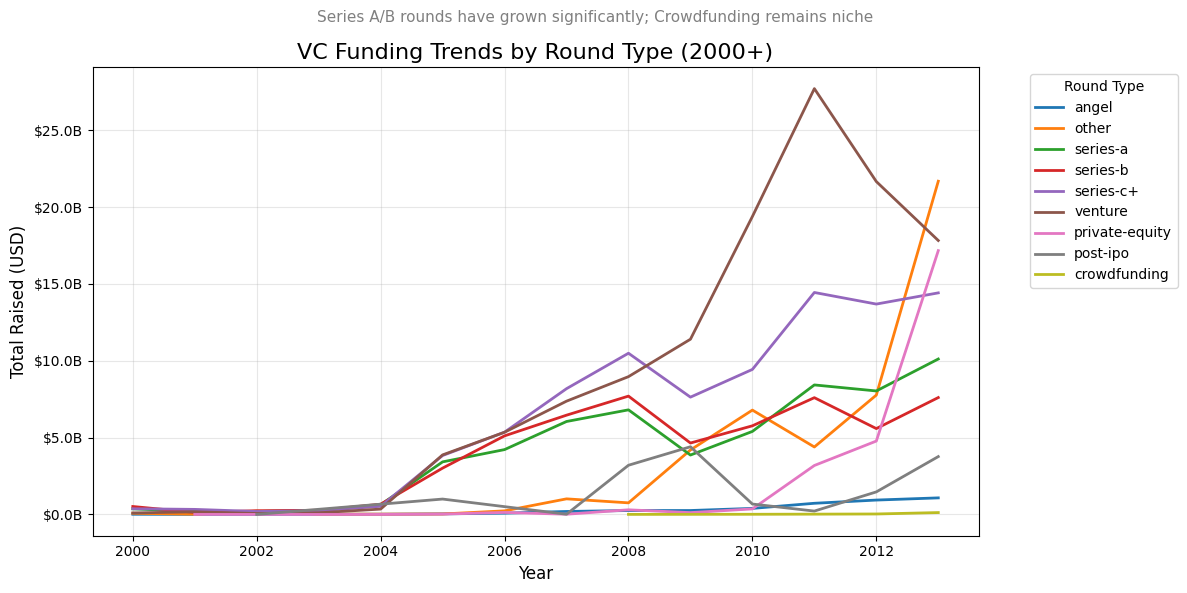

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Group data by year and funding round type
round_year = df.groupby(['year', 'funding_round_type'])['raised_amount_usd'].sum().reset_index()

# Filter for years 2000 and later
filtered = round_year[round_year['year'] >= 2000]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered,
    x='year',
    y='raised_amount_usd',
    hue='funding_round_type',
    linewidth=2
)

# Titles and labels
plt.title("VC Funding Trends by Round Type (2000+)", fontsize=16)
plt.suptitle("Series A/B rounds have grown significantly; Crowdfunding remains niche", fontsize=11, color='gray')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Raised (USD)", fontsize=12)

# Format y-axis with billions
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))

# Move legend outside
plt.legend(title="Round Type", bbox_to_anchor=(1.05, 1), loc='upper left')

# Final touches
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save figure
plt.savefig("figures/funding_trends_by_type.png")
plt.show()




## 📊 VC Funding Trends by Round Type

**🔍 Question:**  
How have funding round types evolved in total investment over time since 2000?

**💡 Insight:**  
Venture capital experienced a significant surge after 2004, peaking around **2011**, aligned with a wave of startup innovation and increased investor risk tolerance in the post-dot-com recovery and pre-IPO boom.

**Series A and B rounds** steadily grew, indicating a strong funnel of startups moving from early traction to institutional support. Meanwhile, **Series C+ and Private Equity** funding exploded post-2010 — likely due to mature startups choosing to **delay IPOs** and remain private longer for higher valuations.

**Angel funding** stayed relatively flat in dollar terms despite its high frequency, suggesting its primary role is **foundational rather than high capital**.

**Crowdfunding and Post-IPO** remained niche throughout, pointing to either limited adoption during this era or underreporting.

**📊 Why This Matters (Business Implication):**  
- **Investors:** May reevaluate allocation across stages; late-stage deals show **increased capital concentration**, while early-stage deals require **volume for diversification**.  
- **Founders:** Should understand capital availability trends — **post-Series A success** opens doors to significantly larger rounds.  
- **Analysts/Accelerators:** Can tailor support services to funding maturity stages; extended private growth may require **longer incubation cycles** and **exit strategy advisory**.



🗂 Exploring the Startup Metadata (objects.csv)
To enrich our funding dataset, we load the objects.csv file which contains metadata about individual startups, including:

Company names

Industry categories (category_code)

Country information (country_code)

Funding round counts and total funding amounts

Status (e.g., operating, acquired)

This dataset provides the context we need to analyze investment patterns by industry and region.
We preview the first few rows to understand its structure and identify key columns for merging and cleaning.

In [ ]:
# Load Objects Dataset 

# Read the startup objects CSV
objects_df = pd.read_csv("startup_data/objects.csv")

# Display the first 5 rows to preview the dataset
objects_df.head()



C:\Users\user\AppData\Local\Temp\ipykernel_13320\680950155.py:4: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  objects_df = pd.read_csv("startup_data/objects.csv")


,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [ ]:
# Inspect Dataset Columns 

# Display columns from funding rounds dataset
df.columns   # from funding_rounds.csv

# Display columns from objects dataset
objects_df.columns   # from objects.csv



Index(['id', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

🔗 Merging Funding Data with Company Metadata

To perform richer analysis, we merge our funding rounds dataset (funding_rounds.csv) with company-level metadata from the objects.csv file. This allows us to associate each funding record with:

The company name

Its industry category

The country it operates in

This left join ensures all funding data is preserved, even if some company details are missing.
We’ll clean and preview the merged result to confirm the integration worked as expected.

In [ ]:
#  Merge funding rounds with company details 

merged_df = df.merge(
    objects_df[['id', 'name', 'category_code', 'country_code']],
    left_on='object_id',
    right_on='id',
    how='left'
)


🧹 Renaming and Cleaning for Clarity

To improve readability and ensure consistency across the dataset, we perform the following steps:

Rename columns like 'name', 'category_code', and 'country_code' to more descriptive labels: 'company_name', 'industry', and 'country'.

Preview the result to confirm the renaming succeeded.

Drop rows where critical context like industry or country is missing, as these are essential for our breakdowns later on.

✅ After this step, we're left with a cleaned dataset of 48,833 records, ready for deeper exploration by industry and geography.

In [ ]:
#  Rename columns for clarity 
merged_df.rename(
    columns={
        'name': 'company_name',
        'category_code': 'industry',
        'country_code': 'country'
    },
    inplace=True
)
# Preview the key columns after renaming 
merged_df[['company_name', 'industry', 'country', 'raised_amount_usd', 'year']].head()


,company_name,industry,country,raised_amount_usd,year
0,Digg,news,USA,8500000.0,2006
1,Facebook,social,USA,500000.0,2004
2,Facebook,social,USA,12700000.0,2005
3,Facebook,social,USA,27500000.0,2006
4,Photobucket,web,USA,10500000.0,2006


In [ ]:
# Drop rows where industry or country information is missing 
clean_df = merged_df.dropna(subset=['industry', 'country'])
# Check the resulting shape (rows, columns) ---
clean_df.shape


(48833, 28)

In [ ]:
# Remove rows where raised funding amount is zero or missing 

clean_df = clean_df[clean_df['raised_amount_usd'] > 0]
# Check the resulting shape (rows, columns) ---

clean_df.shape

(43744, 28)

In [ ]:
#  Clean up spacing and casing for consistency 

# Standardize industry names: lowercase and remove extra spaces
clean_df['industry'] = clean_df['industry'].str.lower().str.strip()

# Standardize country codes: uppercase and remove extra spaces
clean_df['country'] = clean_df['country'].str.upper().str.strip()


In [ ]:
#  Preview the cleaned dataset 

# Display the first few rows to verify the structure
clean_df[['company_name', 'industry', 'country', 'raised_amount_usd', 'year']].head()


,company_name,industry,country,raised_amount_usd,year
0,Digg,news,USA,8500000.0,2006
1,Facebook,social,USA,500000.0,2004
2,Facebook,social,USA,12700000.0,2005
3,Facebook,social,USA,27500000.0,2006
4,Photobucket,web,USA,10500000.0,2006


🔍 Dataset Cleaning Summary

Before diving into the analysis, we took essential steps to ensure the dataset was clean and reliable:

Missing or Zero Values Removed: Rows with missing raised_amount_usd values or zero funding were removed to prevent skewed results.

Consistent Formatting: Industry names were converted to lowercase and stripped of extra spaces. Country codes were standardized to uppercase, ensuring consistency in grouping.

Dropped Incomplete Entries: Any rows missing either industry or country information were dropped, preserving data integrity.

Final Cleaned Dataset Size: After cleaning, the dataset contains 43,744 valid funding entries, ready for exploration.

These steps ensured our EDA would be meaningful, avoiding misleading trends due to nulls, duplicates, or inconsistent formatting.



In [ ]:
# Import Libraries 
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

We begin by importing essential libraries for data manipulation, file handling, and visualization.
- **pandas** for data handling  
- **zipfile & os** for file extraction  
- **matplotlib & seaborn** for plotting  


In [ ]:
# Unzip Dataset 
with zipfile.ZipFile("startup_funding_data.zip.zip", "r") as zip_ref:
    zip_ref.extractall("startup_data")
print("Dataset unzipped!")

Dataset unzipped!


The dataset is provided as a compressed `.zip` file.  
We extract its contents into a local folder called `startup_data` for further use.


In [ ]:
# Load Funding Rounds CSV 
df = pd.read_csv("startup_data/funding_rounds.csv", low_memory=False)

We load the main dataset `funding_rounds.csv` which contains detailed records of startup funding rounds.

In [ ]:
# Initial Cleaning 
df = df[df['raised_amount_usd'].notna()]
df['funded_at'] = pd.to_datetime(df['funded_at'], errors='coerce')
df = df[df['funded_at'].notna()]
df['year'] = df['funded_at'].dt.year

Before diving into analysis, we clean the data by:
- Removing rows with missing funding amounts
- Converting `funded_at` column to datetime format
- Extracting the `year` from the funding date for time-based analysis


C:\Users\user\AppData\Local\Temp\ipykernel_13320\3423409663.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


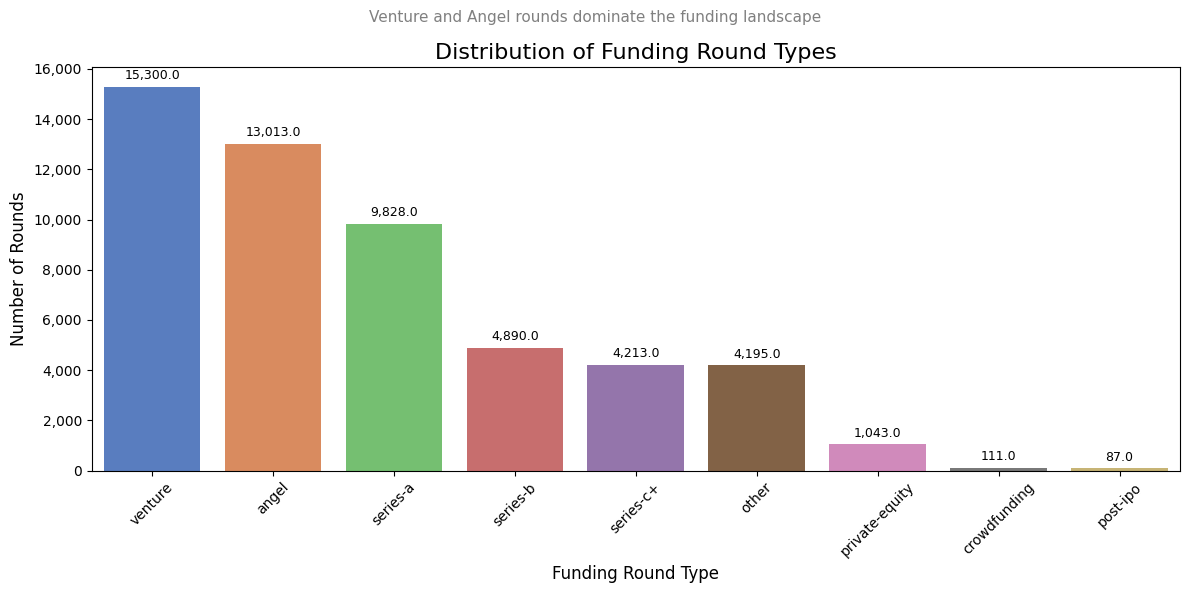

In [ ]:
# Distribution of Funding Round Types 
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df,
    x='funding_round_type',
    order=df['funding_round_type'].value_counts().index,
    palette="muted"
)
plt.title("Distribution of Funding Round Types", fontsize=16)
plt.suptitle("Venture and Angel rounds dominate the funding landscape", fontsize=11, color='gray')
plt.ylabel("Number of Rounds", fontsize=12)
plt.xlabel("Funding Round Type", fontsize=12)
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,}', (p.get_x() + p.get_width() / 2, height + 300), ha='center', fontsize=9)
plt.tight_layout()
plt.savefig("figures/funding_type_distribution.png")
plt.show()


## 🏭 Top Industries by Funding

**📊 Overview:**  
This visualization breaks down the distribution of funding round types across the startup ecosystem, revealing the **most frequently used capital strategies** in startup financing.

**💡 Insight:**  
**Venture** and **Angel** rounds dominate the landscape with **15,300** and **13,013** rounds respectively. These early-stage funding types represent the foundation of the startup lifecycle, highlighting where the majority of deal-making and investor interest occurs.

**Series A** — often the first major institutional backing — follows with **9,828 rounds**, while later rounds such as **Series B** and **Series C+** see diminishing frequency, signaling typical startup attrition as companies scale or exit.  

**Private Equity, Crowdfunding, and Post-IPO** rounds are notably rare, suggesting they are either niche strategies or primarily relevant to outliers and mature companies.

**🎯 Business Implications:**  
- **VCs and Angel Investors:** Should note where competition is densest — early-stage investing remains a high-volume but high-risk space.
- **Startup Founders:** Understanding this funnel can help frame expectations and pitch strategies for each funding stage.
- **Accelerators & Incubators:** Can focus support on helping founders bridge the gap between Angel and Series A/B to boost survival rates.


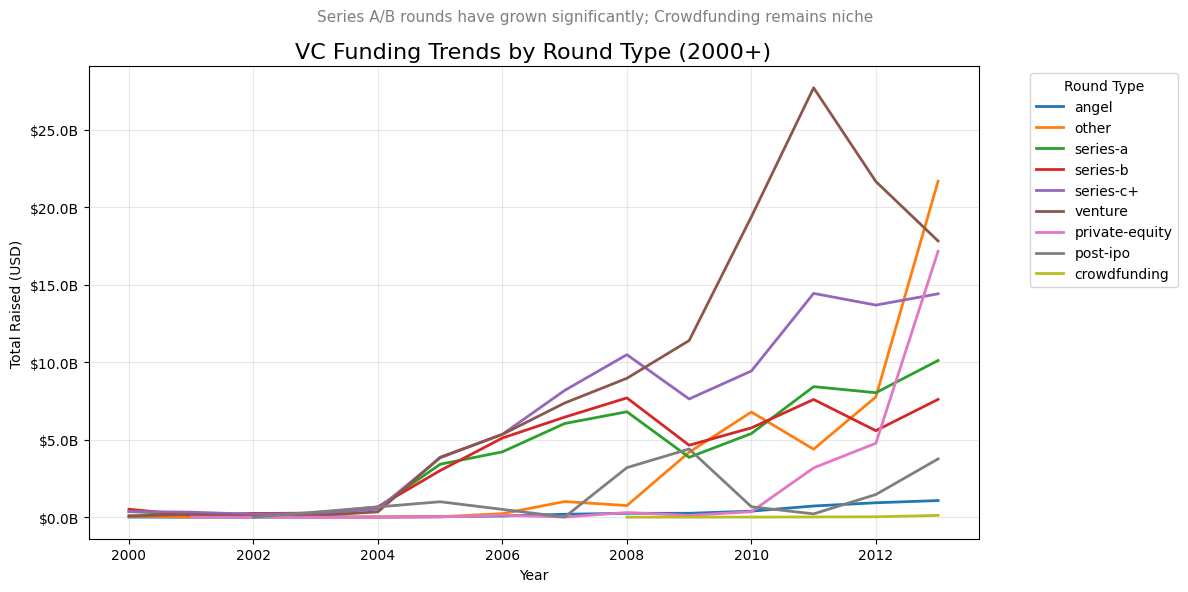

In [ ]:
# VC Funding Trends by Round Type (2000+) 
round_year = df.groupby(['year', 'funding_round_type'])['raised_amount_usd'].sum().reset_index()
filtered = round_year[round_year['year'] >= 2000]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x='year', y='raised_amount_usd', hue='funding_round_type', linewidth=2)
plt.title("VC Funding Trends by Round Type (2000+)", fontsize=16)
plt.suptitle("Series A/B rounds have grown significantly; Crowdfunding remains niche", fontsize=11, color='gray')
plt.xlabel("Year")
plt.ylabel("Total Raised (USD)")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))
plt.legend(title="Round Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("figures/funding_trends_by_type.png")
plt.show()

## 💹 VC Funding Trends by Round Type (2000+)

**📊 Overview:**  
This line chart tracks the evolution of venture capital (VC) funding across various round types from 2000 onward.

**📈 Insight:**  
- **Venture rounds** consistently attracted the most capital, peaking around **2011–2012** with over **$27B** raised — a clear reflection of the startup investment boom during this period.
- **Series A and B** rounds steadily gained traction post-2005, indicating increasing investor confidence in early- and mid-stage startups aligned with the tech surge.
- **Series C+** funding rose sharply post-2010, suggesting more startups are advancing to late-stage financing or scaling more aggressively.
- **Private equity and post-IPO** investments surged after 2010, signaling greater interest in mature startup funding and strategic exits.
- Despite widespread media buzz, **crowdfunding** remains minimal in funding volume, highlighting its limited role compared to institutional rounds.
- The spike in the **"other"** category after 2012 may point to emerging or hybrid funding models entering the market.

**🎯 Business Implications:**  
- **Investors** can use these trends to assess the risk-return profile of entering earlier vs. later funding rounds.
- **Founders** gain clarity on how capital availability shifts by stage — informing when and how to target specific investor groups.
- **Analysts and Policymakers** can trace how macro events (e.g., post-2008 recovery) correlate with startup capital flows.

This visualization helps contextualize VC behavior across time and identifies where capital flows intensify or retreat — crucial for forecasting funding dynamics and strategic planning.



In [ ]:
# Load Objects CSV 
objects_df = pd.read_csv("startup_data/objects.csv", low_memory=False)


📥 Load Company Metadata

In this step, we load the objects.csv file, which contains metadata about each startup, including company name, industry category, and country. This enriches the funding data with contextual company-level information.

In [ ]:
# Merge Datasets 
merged_df = df.merge(
    objects_df[['id', 'name', 'category_code', 'country_code']],
    left_on='object_id', right_on='id', how='left'
)

🔗 Merge Funding and Company Metadata


We perform a left join on the funding dataset and the company metadata using the object_id and id columns. This links each funding record to its corresponding company details, enabling industry and regional analysis.

In [ ]:
# Rename Columns 
merged_df.rename(columns={
    'name': 'company_name',
    'category_code': 'industry',
    'country_code': 'country'
}, inplace=True)

🧹 Rename Columns for Clarity


To enhance readability and consistency, we rename name, category_code, and country_code to company_name, industry, and country, respectively.

In [ ]:
# Drop Rows with Missing Industry or Country 
clean_df = merged_df.dropna(subset=['industry', 'country'])

🚫 Remove Rows with Missing Industry or Country


To ensure clean and analyzable data, we drop rows that are missing either industry or country values. These entries would hinder grouping and aggregation later.

In [ ]:
# Remove Rows with Zero or Missing Funding 
clean_df = clean_df[clean_df['raised_amount_usd'] > 0]

💸 Filter for Valid Funding Amounts


We remove rows where raised_amount_usd is zero or missing. This ensures that only meaningful financial transactions are analyzed in the funding breakdown.

In [ ]:
# Clean Up Spacing and Casing 
clean_df['industry'] = clean_df['industry'].str.strip().str.lower()
clean_df['country'] = clean_df['country'].str.strip().str.upper()

📐 Standardize Text for Clean Analysis


To ensure consistency across text-based fields, we standardize casing and remove extra spaces.



industry values are converted to lowercase.



country codes are formatted as uppercase.
This improves grouping reliability and avoids duplicates caused by format mismatches.

In [ ]:
# Final Preview 
clean_df[['company_name', 'industry', 'country', 'raised_amount_usd', 'year']].head()

,company_name,industry,country,raised_amount_usd,year
0,Digg,news,USA,8500000.0,2006
1,Facebook,social,USA,500000.0,2004
2,Facebook,social,USA,12700000.0,2005
3,Facebook,social,USA,27500000.0,2006
4,Photobucket,web,USA,10500000.0,2006


🔍 Preview of Cleaned Data


A final snapshot of cleaned data is displayed, highlighting key columns:



Company name



Industry



Country



Raised funding amount



Year of funding
This confirms the dataset is ready for deeper visual and analytical exploration.

C:\Users\user\AppData\Local\Temp\ipykernel_13320\3938009433.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=industry_funding, x='raised_amount_usd', y='industry', palette='viridis')


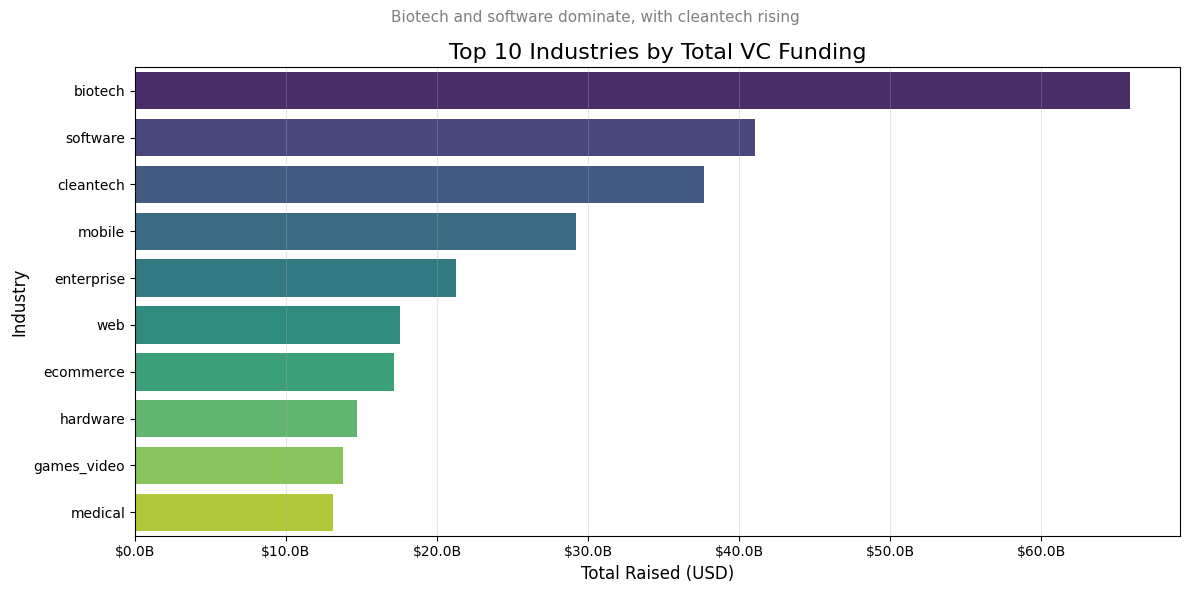

In [ ]:
# Top 10 Industries by Total VC Funding 
industry_funding = clean_df.groupby('industry')['raised_amount_usd'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=industry_funding, x='raised_amount_usd', y='industry', palette='viridis')
plt.title("Top 10 Industries by Total VC Funding", fontsize=16)
plt.suptitle("Biotech and software dominate, with cleantech rising", fontsize=11, color='gray')
plt.xlabel("Total Raised (USD)", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig("figures/funding_by_industry.png")
plt.show()

### 🏭 Industry Insights: Top 10 Sectors by VC Investment

**📊 Overview:**  
This bar chart reveals the top 10 industries receiving the highest total venture capital (VC) funding across the dataset.

**💡 Insight:**  
- **Biotech** dominates the list, attracting over **$60B**, underscoring its pivotal role in driving healthcare innovation, pharmaceuticals, and life sciences.
- **Software** and **Cleantech** follow closely, reflecting consistent VC interest in digital transformation and sustainable technology.
- **Mobile**, **Enterprise**, and **Ecommerce** sectors show strong funding levels — all aligned with scalable platforms and essential services in a digital economy.
- Emerging but resilient verticals like **Games/Video** and **Medical** complete the top 10, highlighting diversified investor interest across both entertainment and healthtech.

**🎯 Business Implications:**  
- **Investors** can use this data to identify high-growth, high-confidence sectors for portfolio focus or diversification.
- **Startup founders** operating in underfunded but promising industries (e.g., gaming or medical) may find niche opportunities for breakthrough.
- **Policy advisors and accelerators** can leverage this to guide support for sectors attracting long-term VC attention or needing growth stimulation.

Overall, this distribution indicates that VC dollars are strongly aligned with industries poised to deliver societal, technological, or environmental transformation.



C:\Users\user\AppData\Local\Temp\ipykernel_13320\2955218721.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


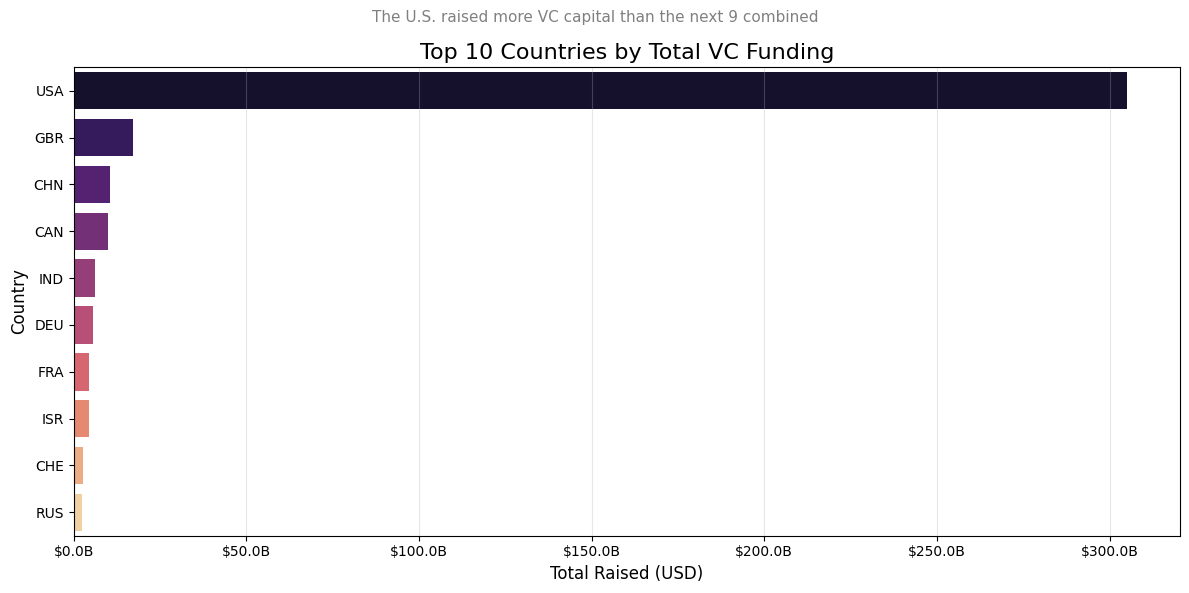

In [63]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Ensure the 'figures' folder exists
os.makedirs("figures", exist_ok=True)

# Prepare the data
country_funding = clean_df.groupby('country')['raised_amount_usd'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_funding, 
    x='raised_amount_usd', 
    y='country', 
    palette='magma'
)

plt.title("Top 10 Countries by Total VC Funding", fontsize=16)
plt.suptitle("The U.S. raised more VC capital than the next 9 combined", fontsize=11, color='gray')
plt.xlabel("Total Raised (USD)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(True, axis='x', alpha=0.3)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))
plt.tight_layout()

# Save and show the plot
plt.savefig("figures/funding_by_country.png")
plt.show()



### 🌍 Top Countries Leading in VC Funding

**📊 Overview:**  
This chart highlights the top 10 countries by total venture capital (VC) raised, offering a global view of where startup ecosystems are most active and well-funded.

**💡 Key Observations:**  
- The **United States** dominates VC activity, raising more capital than the next nine countries combined — a clear sign of its mature startup ecosystem, investor network, and innovation infrastructure.
- **United Kingdom**, **China**, and **Canada** represent secondary hubs, with growing capital flows but still significantly behind the U.S.
- Countries like **India**, **Germany**, and **France** are in mid-tier positions — signaling ecosystems with high potential, especially as local governments invest more in entrepreneurship.
- **Switzerland**, and  **Russia** round out the top 10, indicating smaller yet specialized innovation environments.

**🌍 Global Implications:**  
- **Emerging markets** such as India and Germany show momentum and present high-growth opportunities for investors seeking early exposure before valuations match those of the U.S. or U.K.
- **Governments and policymakers** can use this data to benchmark progress, identify funding gaps, and build policies that attract capital — such as tax incentives, incubator grants, and streamlined regulatory frameworks.
- **Startup founders** in lower-tier countries may consider dual-market strategies: launching locally while securing funding or partnerships from top VC ecosystems.

This geographic breakdown provides a strategic lens for investors, founders, and policymakers aiming to navigate and shape the global innovation landscape.




C:\Users\user\AppData\Local\Temp\ipykernel_13320\1267581266.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


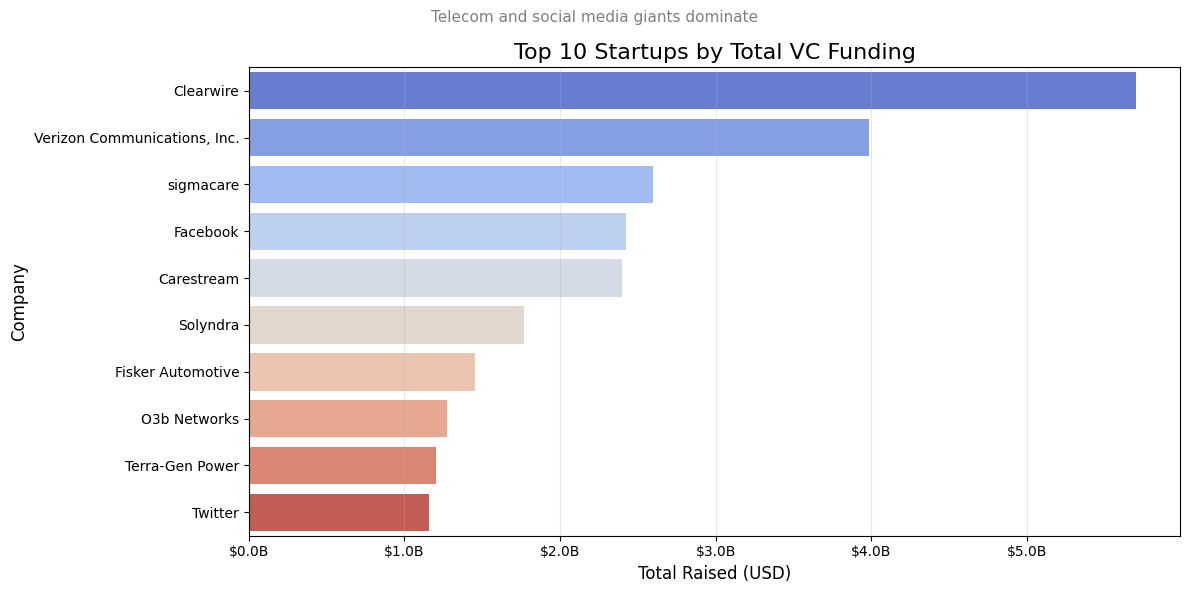

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

# Ensure output directory exists
os.makedirs("figures", exist_ok=True)

# Prepare the data
top_companies = clean_df.groupby('company_name')['raised_amount_usd'].sum().nlargest(10).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_companies,
    x='raised_amount_usd',
    y='company_name',
    palette='coolwarm'
)

plt.title("Top 10 Startups by Total VC Funding", fontsize=16)
plt.suptitle("Telecom and social media giants dominate", fontsize=11, color='gray')
plt.xlabel("Total Raised (USD)", fontsize=12)
plt.ylabel("Company", fontsize=12)

# Format x-axis to show billions with 'B'
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x/1e9:.1f}B'))

plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()

# Save and show
plt.savefig("figures/top_funded_startups.png")
plt.show()




## 🏆 VC Powerhouses: Top 10 Startups by Total Funding Raised

This visualization reveals the top 10 startups by total venture capital (VC) raised, offering insight into sectors and company profiles that consistently attract large-scale investor confidence.

### 📌 Key Highlights:
- **Clearwire** and **Verizon Communications, Inc.** dominate the chart, indicating strong VC conviction in telecom infrastructure and broadband expansion—critical foundations for scaling the digital economy.
- **Sigmacare**, **Facebook**, and **Carestream** reflect significant investment in **health tech** and **social platforms**, showing how VCs prioritize scalable digital care and global connectivity.
- **Solyndra** and **Fisker Automotive**, while known for mixed results, underscore high-risk, high-reward capital flows into **clean energy** and **electric mobility**—areas with massive future upside.
- **Twitter**, with relatively modest funding, exemplifies **capital efficiency** and **brand velocity**, proving that long-term impact isn’t always tied to capital size.

### 💡 Strategic Takeaway:
This breakdown provides a blueprint for founders and investors alike:
- **Founders** can reverse-engineer the traits of highly fundable startups—scalable infrastructure, mass user engagement, and future-proof sectors.
- **Investors** may view this as validation that telecom, social ecosystems, and digital health continue to command VC trust at scale.

Together, these companies showcase how visionary sectors—those transforming communication, care, and sustainability—remain top-of-mind for venture capital at the highest levels.
.


## 🔍 Final Reflection & Project Summary

This project explored global venture capital (VC) investment patterns through a combination of **exploratory data analysis (EDA)** and a **custom-built interactive dashboard**. By blending **data engineering, visualization, forecasting, and UI/UX design**, I uncovered actionable insights on startup funding trends across industries, geographies, and time.

---

### 💡 Key Findings
- The **U.S. raised more VC funding than the next nine countries combined**, underscoring its dominant role in global innovation ecosystems.
- **Telecom, biotech, and social platforms** emerged as top-funded sectors, showing VC preference for scalable, infrastructure-heavy industries.
- Visual trends and a **machine learning forecast** suggest ongoing funding momentum in **cleantech** and **biotech**, particularly across North America and Western Europe.

---

### 🛠️ Skills Applied

#### 🧮 Data Engineering & Preprocessing
- Cleaned, merged, and transformed large-scale datasets using `pandas`
- Managed missing data, coerced inconsistent date formats, filtered anomalies
- Engineered features like **funding year**, enabling trend and time-series analysis

#### 📊 Exploratory Visualization
- Created publication-ready plots using `seaborn` and `matplotlib`:
  - Ranked charts by **country, industry, company, and round type**
  - Integrated best practices in labeling, spacing (`tight_layout()`), and file exporting (`savefig()`)
- Wrote **insight-driven markdowns** for each figure to communicate findings clearly to stakeholders

#### 🤖 Machine Learning & Forecasting
- Trained a `LinearRegression` model using `scikit-learn` to project future VC trends
- Embedded forecast output directly into the dashboard for **real-time insight generation**

#### 💻 Streamlit Dashboard Development
- Built a **dark-themed interactive dashboard** using `Streamlit`, featuring:
  - **Sidebar filters** (year, country, industry, color scale)
  - **Metric cards** for funding KPIs using `streamlit-extras`
  - Interactive **Plotly visualizations**: choropleth maps, line charts, and heatmaps
  - Custom **HTML/CSS leaderboard table** for top-funded startups
  - Embedded forecasting logic and year-over-year predictions
  - Drill-down exploration by selected country and sector

#### 🎨 UI/UX & Data Communication
- Prioritized intuitive layout — **all insights are visible above the fold**
- Used consistent headers, tooltips, and styling to guide user interpretation
- Designed dashboard for both **technical teams** and **non-technical decision-makers**

---

### 🚀 Project Impact & Next Steps
This end-to-end project demonstrates my ability to:
- Engineer clean, analysis-ready data pipelines
- Extract and communicate insights through compelling visuals
- Deliver **recruiter-ready, stakeholder-usable dashboards** that support real-world decisions

**Next Steps:**
- Connect to a **NoSQL data source** (e.g., MongoDB) for real-time updates
- Deploy the dashboard publicly via **Streamlit Cloud** or **Heroku**
- Add **CSV/PDF export features** for enterprise users
- Expand forecasting using **Prophet** or **ARIMA** for seasonality-aware trends

---

This project is a testament to my ability to combine **technical depth with business relevance** — a core strength for roles in **data science, product analytics, and AI-driven strategy**.
